In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from nonconformist.cp import IcpRegressor
from nonconformist.nc import RegressorNc, AbsErrorErrFunc


# Load Boston housing data
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Train OLS regressor
ols = LinearRegression()
ols.fit(X_train, y_train)

# Get predictions for test set
ols_prediction = ols.predict(X_test)

# Create nonconformity function and conformal predictor
nc = RegressorNc(ols, AbsErrorErrFunc())
icp = IcpRegressor(nc)

# Calibrate ICP using training data and obtain predictions for test set
icp.fit(X_train, y_train)

# Calibrate ICP using training data and obtain predictions for test set
icp.calibrate(X_test, y_test)

# Produce predictions for test set and obtain indices of inliers
icp_prediction = icp.predict(X_test, significance=0.2)

print(ols_prediction)
print(icp_prediction)

[2.3874481  1.43302789 2.0358385  ... 1.59919224 1.61828523 0.81619723]
[[1.61087862 3.16401758]
 [0.65645841 2.20959737]
 [1.25926902 2.81240798]
 ...
 [0.82262276 2.37576172]
 [0.84171575 2.39485471]
 [0.03962775 1.59276671]]


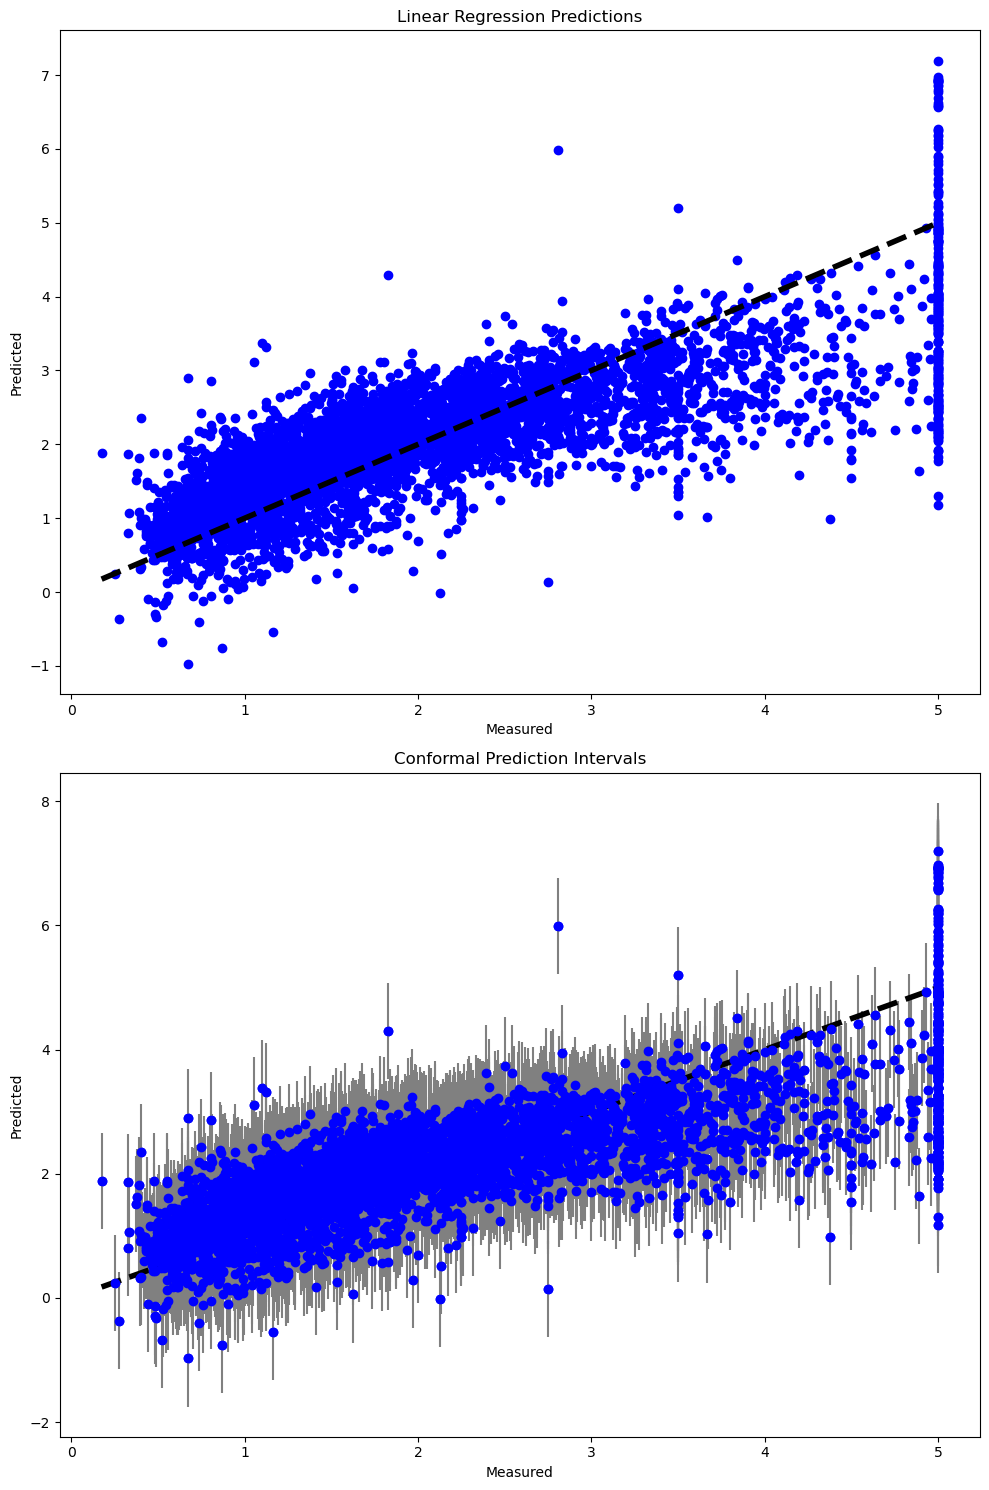

In [13]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))

# Plot the linear regression predictions
axes[0].scatter(y_test, ols_prediction, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
axes[0].set_xlabel('Measured')
axes[0].set_ylabel('Predicted')
axes[0].set_title('Linear Regression Predictions')

# Plot the conformal prediction intervals
lower_bounds, upper_bounds = icp_prediction[:, 0], icp_prediction[:, 1]
axes[1].scatter(y_test, (upper_bounds + lower_bounds) / 2, color='blue')
axes[1].errorbar(y_test, (upper_bounds + lower_bounds) / 2, yerr=(upper_bounds - lower_bounds) / 2, fmt='o', color='blue', ecolor='grey')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
axes[1].set_xlabel('Measured')
axes[1].set_ylabel('Predicted')
axes[1].set_title('Conformal Prediction Intervals')

# Show the plot
plt.tight_layout()
plt.show()

**Linear Regression Predictions Plot**: This plot is a scatter plot of the predicted house prices (y-axis) versus the actual house prices (x-axis) using the linear regression model. The line in this plot is the line y=x, which represents perfect predictions: if all the points fell on this line, it would mean that for every house, the predicted price was exactly equal to the actual price. Deviations from this line show the errors in the predictions. This plot helps to visualize how well the linear regression model is predicting house prices.

**Conformal Prediction Intervals Plot**: This plot is also a scatter plot of the predicted house prices (y-axis) versus the actual house prices (x-axis). However, in this case, the "predicted price" is the midpoint of the prediction interval provided by the conformal prediction method. The error bars represent the prediction intervals: the range of values in which we are fairly confident (90% confidence in the provided code) that the actual house price lies, according to the conformal prediction method. The line in this plot is also the line y=x, so points falling on this line indicate perfect predictions. The error bars give a sense of the uncertainty of the predictions: larger error bars mean more uncertainty.